# Import Modules

In [21]:
import pandas as pd
import numpy as np

import utils

# Load Data

In [22]:
target_vegetable = "トマト"
train_size = 4000

In [23]:
train = pd.read_csv("./data/train.csv")
train["date"] = pd.to_datetime(train["date"], format="%Y%m%d")

train["year"] = train.date.dt.year
years = pd.get_dummies(train["year"])
train = train.drop(columns="year")
train = pd.concat([train, years], axis=1)

train["month"] = train.date.dt.month
months = pd.get_dummies(train["month"])
train = train.drop(columns="month")
train = pd.concat([train, months], axis=1)

train["weekday"] = train.date.dt.weekday
weekdays = pd.get_dummies(train["weekday"])
train = train.drop(columns="weekday")
train = pd.concat([train, weekdays], axis=1)

areas = pd.get_dummies(train["area"])
train = train.drop(columns="area")
train = pd.concat([train, areas], axis=1)

target_values = utils.get_target_values(train, target_vegetable)
train_loader, test_y, train, test, ss = utils.preprocess_data(target_values, train_size=train_size)

# Set Free Params

In [24]:
future = test.shape[0]
num_epochs = 200
learning_rate = 0.005
weight_decay = 1e-3
patience = 30

# Training

early stop at: 0.512688159942627


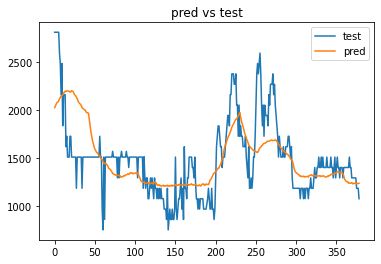

In [25]:
pred_y, _ = utils.pipeline_rnn(train_loader, train, test, test_y, future=future,
                               num_epochs=num_epochs, lr=learning_rate, weight_decay=weight_decay, patience=patience)

pred_y = pred_y.cpu().detach().numpy()
pred = np.concatenate([pred_y.reshape(-1, 1), test[:, 1:]], axis=1)

utils.plot_prediction(pred, test, ss)

# Terminal Score

In [ ]:
utils.get_terminal_score()